HIERARCHICAL CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [6]:
import warnings 
warnings.filterwarnings("ignore")

In [7]:
EWAir=pd.read_csv("EastWestAirline.csv")
EWAir.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [8]:
# lets normalize using normalization function
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [9]:
# normalized dataframe (considering the numerical values)
EWAir_norm=norm_fun(EWAir.iloc[:,1:])
EWAir_norm.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0


In [10]:
EWAir_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3999 non-null   float64
 1   Qual_miles         3999 non-null   float64
 2   cc1_miles          3999 non-null   float64
 3   cc2_miles          3999 non-null   float64
 4   cc3_miles          3999 non-null   float64
 5   Bonus_miles        3999 non-null   float64
 6   Bonus_trans        3999 non-null   float64
 7   Flight_miles_12mo  3999 non-null   float64
 8   Flight_trans_12    3999 non-null   float64
 9   Days_since_enroll  3999 non-null   float64
 10  Award?             3999 non-null   float64
dtypes: float64(11)
memory usage: 343.8 KB


"we can use distance calculation method between cluster as euclidean,manhattan,l1,l2,cosine,precomputed":: and distance between cluster and point by "single,complete,average"

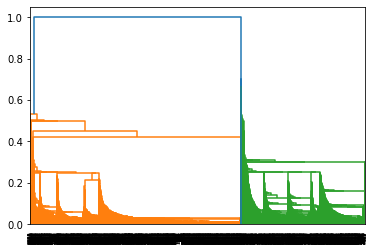

In [12]:
# forming the dendrogram 
dendrogram=sch.dendrogram(sch.linkage(EWAir_norm,method='single'))

In [11]:
# cluster formation
h_c=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')

In [12]:
h_c.fit_predict(EWAir_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [13]:
y_hc=h_c.fit_predict(EWAir_norm)
#cluster_h=pd.DataFrame(y_hc,columns=['cluster_h'])
#cluster_h
EWAir[['h_cluster']]=y_hc

In [14]:
EWAir.iloc[:,10:].head(5)

,Days_since_enroll,Award?,h_cluster
0,7000,0,0
1,6968,0,0
2,7034,0,0
3,6952,0,0
4,6935,1,1


In [15]:
EWAir.head(6)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0


In [18]:
EWAir.groupby(['h_cluster'])['Bonus_miles'].apply(lambda x:tuple(x))

h_cluster
0    (174, 215, 4123, 500, 0, 27482, 7278, 11150, 3...
1    (43300, 5250, 1753, 28426, 61105, 49442, 48963...
2                                             (71954,)
3                                            (200622,)
4                                            (112171,)
Name: Bonus_miles, dtype: object

# using k-means

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [22]:
EWAir_normk=norm_fun(EWAir.iloc[:,1:12]) # consider the normalized value of EWAir Dataset 
EWAir_normk # EWAir_normk (for kmeans)is the normailzed values of EWAir excluding h_cluster from the dataset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [23]:
model_kmeans=KMeans(n_clusters=5)
model_kmeans.fit(EWAir_normk)

KMeans(n_clusters=5)

In [24]:
model_kmeans.labels_

array([0, 0, 0, ..., 1, 3, 3])

In [25]:
EWAir['K_cluster']=pd.Series(model_kmeans.labels_)
EWAir

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,K_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,3


In [27]:
# to check the k_cluster values combinations for diffent features
EWAir.groupby(['K_cluster'])['Bonus_miles'].apply(lambda x:tuple(x))

K_cluster
0    (174, 215, 4123, 500, 0, 7278, 11150, 3258, 0,...
1    (43300, 1753, 28426, 61105, 49442, 48963, 2740...
2    (27482, 20797, 42044, 18493, 34339, 34024, 155...
3    (1375, 333, 10369, 3658, 1164, 965, 1058, 0, 1...
4    (5250, 4291, 13300, 4655, 650, 0, 10000, 23600...
Name: Bonus_miles, dtype: object

<AxesSubplot:xlabel='Bonus_miles', ylabel='Days_since_enroll'>

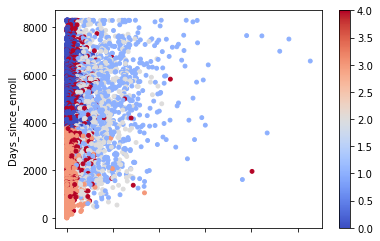

In [31]:
EWAir.plot(x='Bonus_miles',y = 'Days_since_enroll',c=model_kmeans.labels_,kind="scatter",s=15,cmap=plt.cm.coolwarm)

# DBSCAN clustering

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [33]:
EWAir.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,K_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1


In [34]:
array=(EWAir.iloc[:,1:12]).values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [35]:
stdsclr=StandardScaler().fit(array) # we are normalsing the dataset by using Standard scaler 
x=stdsclr.transform(array)

In [36]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
dbscan=DBSCAN(eps=.8,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.8)

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
EWAir[['Dbscan_cluster']]=dbscan.labels_
EWAir

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_cluster,K_cluster,Dbscan_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1,4,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1,4,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,3,0


In [41]:
EWAir.groupby(['Dbscan_cluster'])['Bonus_miles'].apply(lambda x: tuple(x))

Dbscan_cluster
-1    (43300, 1753, 28426, 13300, 3450, 4025, 42044,...
 0    (174, 215, 4123, 500, 0, 27482, 7278, 11150, 3...
 1    (5250, 61105, 49442, 48963, 4291, 27408, 10447...
 2           (64186, 63866, 64360, 61971, 62107, 68947)
 3    (5095, 6894, 9048, 11961, 10458, 8275, 7889, 5...
 4                  (10819, 14568, 16314, 15370, 17759)
 5                         (62571, 67027, 73933, 76661)
 6                           (0, 1800, 0, 0, 7625, 100)
 7    (18284, 20055, 16093, 23130, 14581, 19169, 14981)
Name: Bonus_miles, dtype: object